In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('./scv.csv',encoding='cp949')

df

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 0:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 0:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 0:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 0:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 1:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트)


In [48]:
df2 = pd.read_csv('./scv.csv', \
                  usecols=['장소대분류','장소소분류'],encoding='cp949')
df2

,장소대분류,장소소분류
0,기타,기타야외
1,주거,단독주택
2,"자동차,철도차량",승용자동차
3,기타,야적장
4,기타서비스,기타 건축물
...,...,...
40098,산업시설,제재 및 목공업
40099,산업시설,기타 동식물시설
40100,"판매,업무시설",오피스텔
40101,"판매,업무시설",할인점(마트)


In [49]:
df2.describe()

,장소대분류,장소소분류
count,40103,40103
unique,15,311
top,주거,단독주택
freq,11058,3957


In [50]:
gb1 = df2.groupby(by='장소대분류')
gb1

In [51]:
gb1.sum()

,장소소분류
장소대분류,
교육시설,대학교고등학교고등학교초등학교일반학원종합학원고등학교외국어학원일반학원특수학교기타 학교일...
기타,기타야외야적장기타야외쓰레기기타야외쓰레기쓰레기기타야외쓰레기쓰레기기타야외기타도로공터기타...
기타서비스,기타 건축물기타 건축물기타 건축물기타 건축물기타 건축물기타 건축물기타 건축물기타 건...
문화재시설,국가지정문화재국가지정문화재기타 문화재
산업시설,제재 및 목공업기타 동식물시설기타 작업장기타 발전시설식료품공업금속기계 및 기구공업기...
생활서비스,"기타 음식점한식횟집치킨,족발일반주점치킨,족발일식횟집한식호프집일반상점한식(휴게)분식한..."
"선박,항공기",어선기타 선박어선어선바지선어선기타 선박유조선바지선기타 선박기타 선박어선어선바지선수상...
운수자동차시설,"카센터자동차검사장, 매매장, 부속상, 정비공장기타 역사,터미널자동차검사장, 매매장,..."
"위험물,가스제조소",옥내저장소이동탱크저장소주유취급소제조소일반취급소제조소주유취급소기타 위험물제조소일반취급...


In [52]:
gb2=gb1.count()
gb2

,장소소분류
장소대분류,
교육시설,314
기타,7020
기타서비스,1811
문화재시설,3
산업시설,5429
생활서비스,4045
"선박,항공기",108
운수자동차시설,269
"위험물,가스제조소",29


In [53]:
len(gb2)

15

In [44]:
gb2['장소소분류'].sum()

40103

In [11]:
n1=(314/40103)*100
n1=round(n1,2)

In [12]:
n2=(7020/40103)*100
n2=round(n2,2)

In [13]:
n3=(1811/40103)*100
n3=round(n3,2)

In [14]:
n4=(3/40103)*100
n4=round(n4,2)

In [15]:
n5=(5429/40103)*100
n5=round(n5,2)

In [16]:
n6=(4045/40103)*100
n6=round(n6,2)

In [17]:
n7=(108/40103)*100
n7=round(n7,2)

In [18]:
n8=(269/40103)*100
n8=round(n8,2)

In [19]:
n9=(29/40103)*100
n9=round(n9,2)

In [20]:
n10=(338/40103)*100
n10=round(n10,2)

In [21]:
n11=(2211/40103)*100
n11=round(n11,2)

In [22]:
n12=(4710/40103)*100
n12=round(n12,2)

In [23]:
n13=(11058/40103)*100
n13=round(n13,2)

In [24]:
n14=(343/40103)*100
n14=round(n14,2)

In [25]:
n15=(2415/40103)*100
n15=round(n15,2)

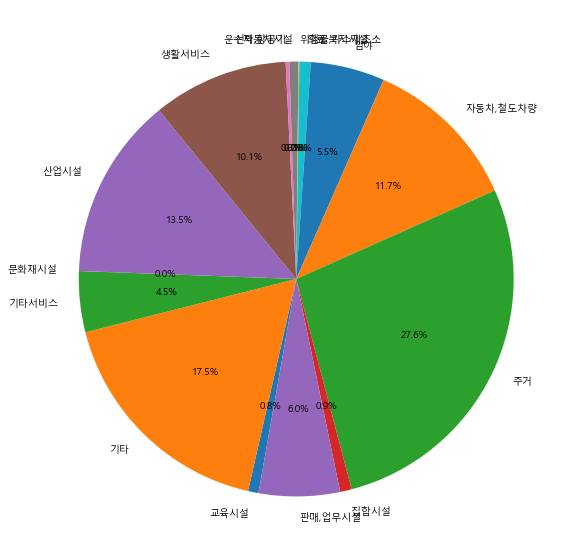

In [54]:
# 시작 각도와 방향
plt.rc('font', family='Malgun Gothic')
ratio = [n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12, n13, n14, n15]
labels = ['교육시설', '기타', '기타서비스', '문화재시설', '산업시설', '생활서비스', '선박,항공기', '운수자동차시설', '위험물,가스제조소', '의료,복지시설', '임야', '자동차,철도차량', '주거', '집합시설', '판매,업무시설']
 
# startangle : 시작 각도 / 디폴트는 0도 (양의 방향 x축)로 설정
# counterclock=False : 시계 방향 순서로 부채꼴 영역이 표시
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()